# CSV 파일 불러오기

In [24]:
import pandas as pd

df=pd.read_csv("student-mat.csv",delimiter=';')

df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10


In [25]:
df.columns.tolist()

['school',
 'sex',
 'age',
 'address',
 'famsize',
 'Pstatus',
 'Medu',
 'Fedu',
 'Mjob',
 'Fjob',
 'reason',
 'guardian',
 'traveltime',
 'studytime',
 'failures',
 'schoolsup',
 'famsup',
 'paid',
 'activities',
 'nursery',
 'higher',
 'internet',
 'romantic',
 'famrel',
 'freetime',
 'goout',
 'Dalc',
 'Walc',
 'health',
 'absences',
 'G1',
 'G2',
 'G3']

# Data Encodig

In [26]:
# module import

from sklearn.preprocessing import LabelEncoder

In [27]:
# 라벨 인코딩 함수
def label_encode(data, column):
    label_encoder = LabelEncoder()
    data[column] = label_encoder.fit_transform(data[column])
    return data

# 데이터(data)와 인코딩할 열(column)을 전달하여 label encoding 수행
df = label_encode(df, 'school')
df = label_encode(df, 'sex')
df = label_encode(df, 'address')
df = label_encode(df, 'famsize')
df = label_encode(df, 'Pstatus')
df = label_encode(df, 'Mjob')
df = label_encode(df, 'Fjob')
df = label_encode(df, 'reason')
df = label_encode(df, 'guardian')
df = label_encode(df, 'schoolsup')
df = label_encode(df, 'famsup')
df = label_encode(df, 'paid')
df = label_encode(df, 'activities')
df = label_encode(df, 'nursery')
df = label_encode(df, 'higher')
df = label_encode(df, 'internet')
df = label_encode(df, 'romantic')


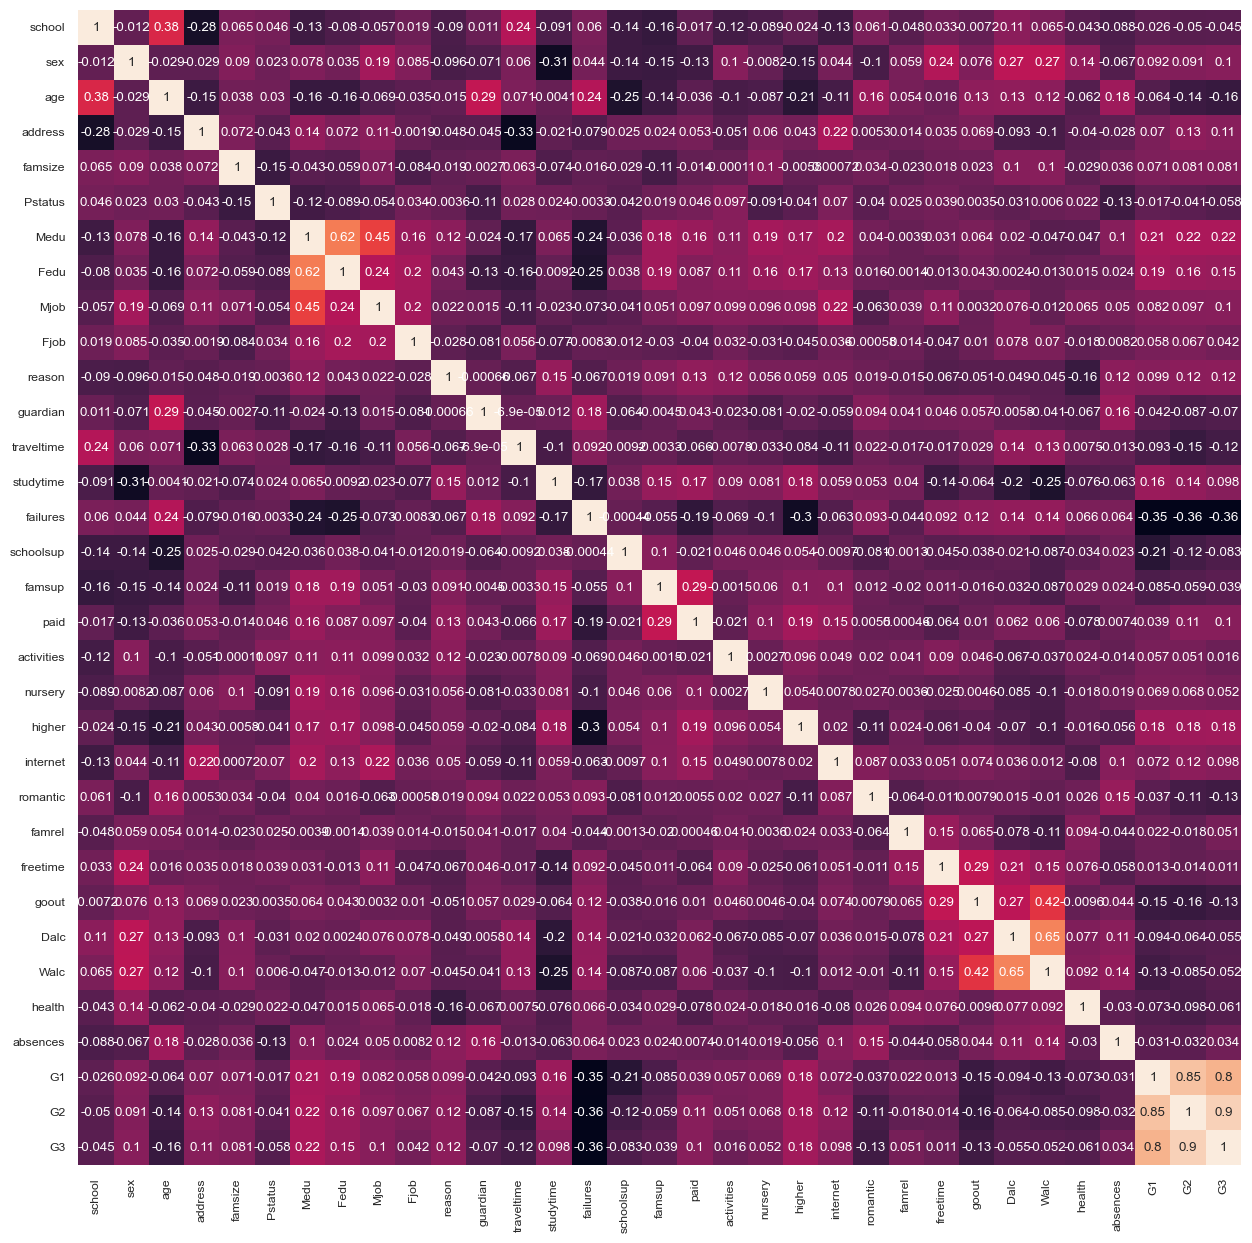

In [28]:
# 상관 관계 행렬
# 0.3 이상인 경우 상관관계가 있고, 0.7이상이면 아주 높음

import matplotlib.pyplot as plt
import seaborn as sns

df_corr=df.corr()

# 히트맵
plt.figure(figsize=(15,15))
sns.set(font_scale=0.8)
sns.heatmap(df_corr, annot=True, cbar=False)
plt.show()


In [29]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np

X = df.drop('G3', axis = 1)
Y = df['G3']

X_train, X_test, y_train, y_test=train_test_split(X,
                                                  Y,
                                                  test_size=0.2,
                                                  shuffle=True,
                                                  random_state=12)

model = LinearRegression()
model.fit(X_train, y_train)

ly_preds = model.predict(X_test)
mse = np.sqrt(mean_squared_error(ly_preds, y_test))
print('평균제곱근오차', mse)

평균제곱근오차 2.422811392217509


In [30]:
# 32개의 Feature 중 상관관계가 높은 31개의 Feature만을 사용해보기
# 가장 상관관계가 낮은 failures drop

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

new_df = df.drop('failures', axis = 1)

X = new_df.drop('G3', axis = 1)
Y = new_df['G3']

X_train, X_test, y_train, y_test=train_test_split(X,
                                                  Y,
                                                  test_size=0.2,
                                                  shuffle=True,
                                                  random_state=12)

model = LinearRegression()
model.fit(X_train, y_train)

ly_preds = model.predict(X_test)
mse = np.sqrt(mean_squared_error(ly_preds, y_test))
print('평균제곱근오차', mse)

# 결과 : 이전보다 MSE값이 줄어들었다.

평균제곱근오차 2.4160512891225827


In [31]:
# 32개의 Feature 중 상관관계가 높은 30개의 Feature만을 사용해보기
# 가장 상관관계가 낮은 age drop

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

new_df = df.drop('age', axis = 1)

X = new_df.drop('G3', axis = 1)
Y = new_df['G3']

X_train, X_test, y_train, y_test=train_test_split(X,
                                                  Y,
                                                  test_size=0.2,
                                                  shuffle=True,
                                                  random_state=12)

model = LinearRegression()
model.fit(X_train, y_train)

ly_preds = model.predict(X_test)
mse = np.sqrt(mean_squared_error(ly_preds, y_test))
print('평균제곱근오차', mse)

# 결과 : MSE값이 줄어들었다.

평균제곱근오차 2.3703905509160093


In [32]:
# 32개의 Feature 중 상관관계가 높은 29개의 Feature만을 사용해보기
# 가장 상관관계가 낮은 romantic drop

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

new_df = df.drop('goout', axis = 1)

X = new_df.drop('G3', axis = 1)
Y = new_df['G3']

X_train, X_test, y_train, y_test=train_test_split(X,
                                                  Y,
                                                  test_size=0.2,
                                                  shuffle=True,
                                                  random_state=12)

model = LinearRegression()
model.fit(X_train, y_train)

ly_preds = model.predict(X_test)
mse = np.sqrt(mean_squared_error(ly_preds, y_test))
print('평균제곱근오차', mse)

# 결과 : MSE값이 늘었다.

# 결론 : student-mat에서 failures, age값을 버릴 때, 가장 낮은 MSE값이 나왔다.

평균제곱근오차 2.422543751091843


# 모델별로 MSE 비교해보기

In [33]:
# Linear Regression

from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

from sklearn.metrics import mean_squared_error

ly_preds = model.predict(X_test)
mse = np.sqrt(mean_squared_error(ly_preds, y_test))
print('평균제곱근오차', mse)

평균제곱근오차 2.422543751091843


In [34]:
# Decision Tree

from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor()
model.fit(X_train, y_train)

from sklearn.metrics import mean_squared_error

dy_preds = model.predict(X_test)
mse = np.sqrt(mean_squared_error(dy_preds, y_test))
print('평균제곱근오차', mse)

평균제곱근오차 2.817216509386436


In [35]:
# Random Forest

from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(X_train, y_train)

from sklearn.metrics import mean_squared_error

ry_preds = model.predict(X_test)
mse = np.sqrt(mean_squared_error(ry_preds, y_test))
print('평균제곱근오차', mse)

평균제곱근오차 2.1924715837541933


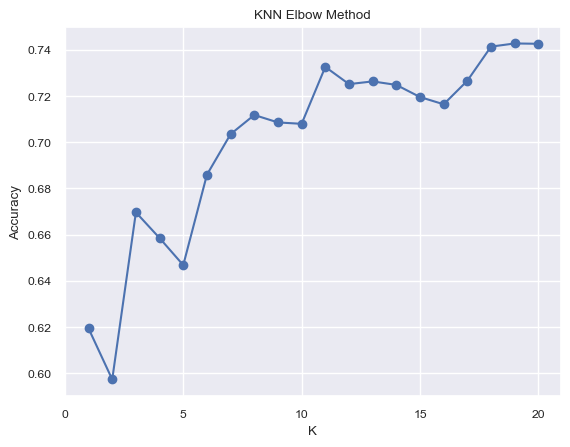

In [36]:
# KNN Algorithm (KNN elbow 구하기)

from sklearn.neighbors import KNeighborsRegressor

# 다양한 이웃 수(K)에 대해 정확도를 저장할 리스트 초기화
neighbors = list(range(1, 21))
accuracies = []

# 다양한 이웃 수에 대해 모델을 훈련하고 정확도를 평가
for k in neighbors:
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train, y_train)
    score = knn.score(X_test, y_test)
    accuracies.append(score)

# 정확도를 시각화
plt.plot(neighbors, accuracies, marker='o')
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.title('KNN Elbow Method')
plt.xticks(range(0, 21, 5))
plt.show()


In [37]:
# KNN Algorithm

model = KNeighborsRegressor(n_neighbors = 18)
model.fit(X_train, y_train)

ky_pred = model.predict(X_test)
mse = np.sqrt(mean_squared_error(ky_pred, y_test))
print('평균제곱근오차', mse)

평균제곱근오차 2.127095457097968


In [ ]:
# 결론 : KNN Algorithm, Random Forest, Linear Regression, Decision Tree 순서대로 정확도가 높았다.